--2025-09-05 11:10:26--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.62.113, 54.231.134.17, 52.216.56.161, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.62.113|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  19.4MB/s    in 42s     

2025-09-05 11:11:08 (18.7 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2025-09-05 11:11:09--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.28.172, 52.216.58.105, 52.216.248.252, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.28.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trai

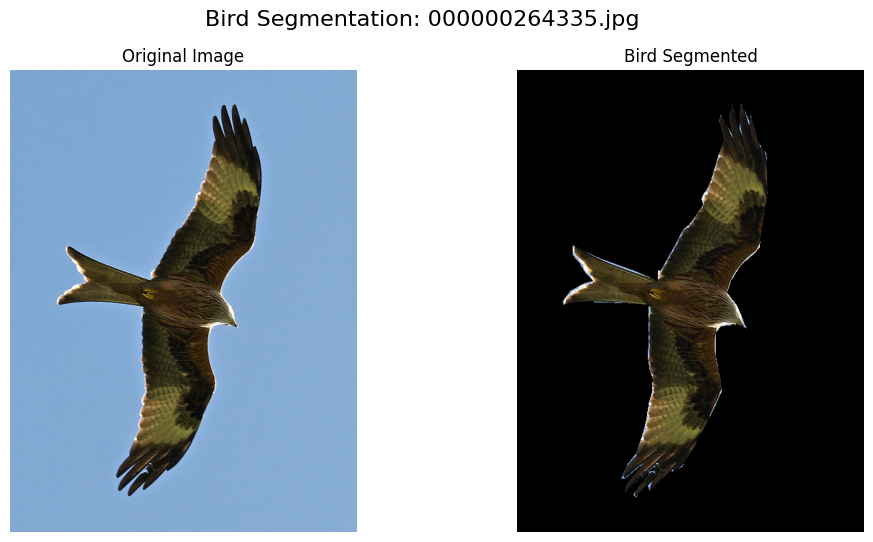

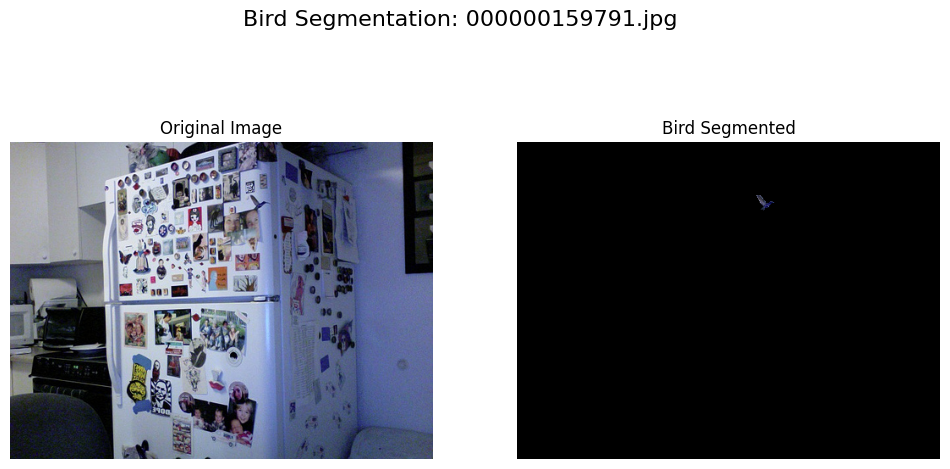

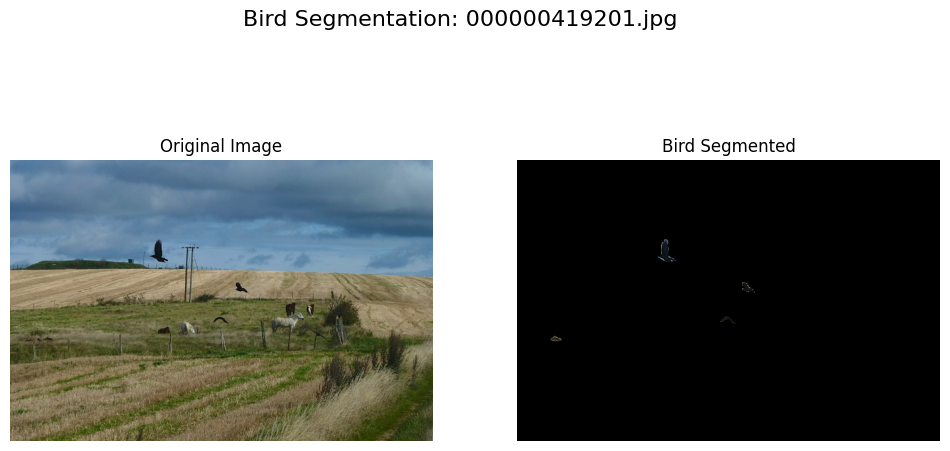

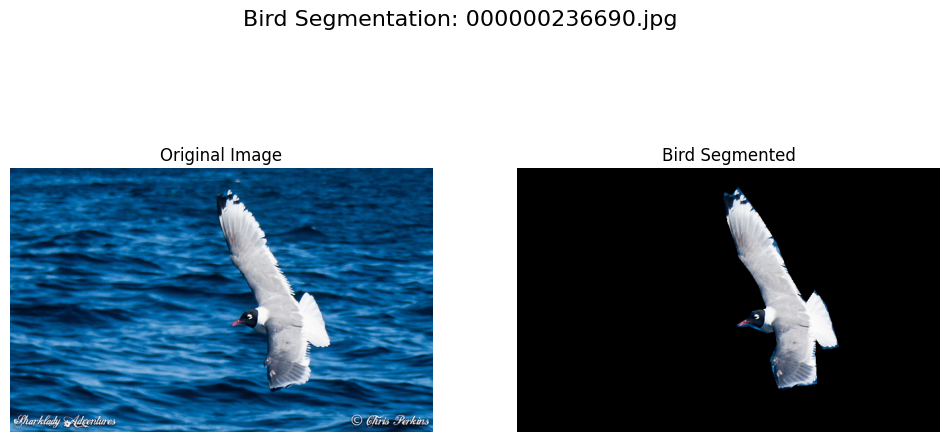

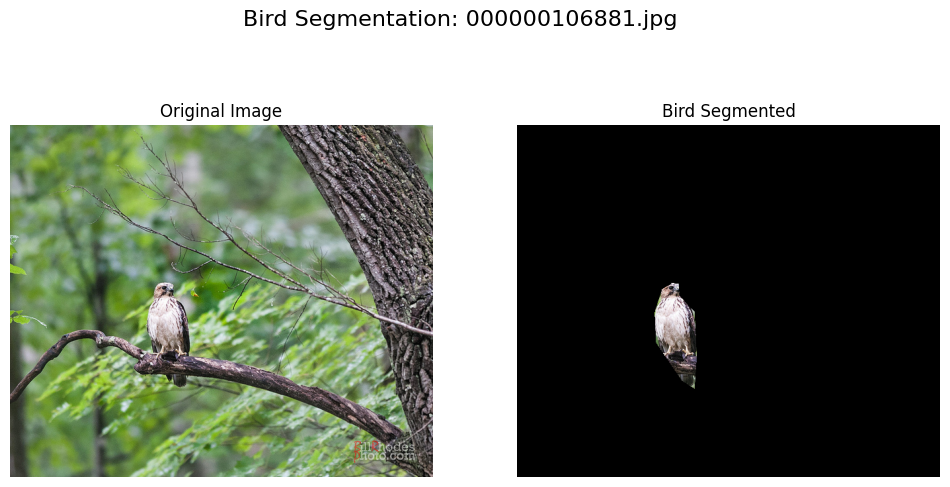

In [2]:
!wget -c http://images.cocodataset.org/zips/val2017.zip
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip

!unzip -q val2017.zip -d /content/
!unzip -q annotations_trainval2017.zip -d /content/

import os, random, numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Paths
image_dir = "/content/val2017"
ann_file = "/content/annotations/instances_val2017.json"

coco = COCO(ann_file)

bird_class_id = 16
bird_img_ids = coco.getImgIds(catIds=[bird_class_id])
print(f"Found {len(bird_img_ids)} images with birds in COCO val2017.")

images_to_display = random.sample(bird_img_ids, min(5, len(bird_img_ids)))

for img_id in images_to_display:
    img_info = coco.loadImgs(img_id)[0]
    image_path = os.path.join(image_dir, img_info['file_name'])

    original_image = Image.open(image_path).convert("RGB")
    img_np = np.array(original_image)

    ann_ids = coco.getAnnIds(imgIds=img_id, catIds=[bird_class_id], iscrowd=None)
    anns = coco.loadAnns(ann_ids)

    bird_mask = np.zeros((img_info['height'], img_info['width']), dtype=np.uint8)
    for ann in anns:
        mask = coco.annToMask(ann)
        bird_mask = np.maximum(bird_mask, mask)

    segmented_bird_np = np.zeros_like(img_np)
    segmented_bird_np[bird_mask == 1] = img_np[bird_mask == 1]

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.suptitle(f"Bird Segmentation: {img_info['file_name']}", fontsize=16)

    ax[0].imshow(original_image); ax[0].set_title("Original Image"); ax[0].axis("off")
    ax[1].imshow(segmented_bird_np); ax[1].set_title("Bird Segmented"); ax[1].axis("off")
    plt.show()
